# **<font color='BROWN'>CLEAN TEST</font>**

## **<font color='red'>Ubicarnos en el directorio de Drive</font>**

In [ ]:
import os
#Acceder a documentos desde google drive
from google.colab import drive
drive.mount('/content/drive')

os.chdir('/content/drive/MyDrive/Master DS/Machine Learning/TAREA/dataset')
os.getcwd()  
!ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
cleanTestPumps.ipynb   modelsPumps.ipynb  train.csv
cleanTrainPumps.ipynb  NBGaussian_pumps   train_labels.csv
datosPumpsLimpios.csv  test.csv


## **<font color='red'>Carga de Librerías</font>**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import datetime

## **<font color='red'>Carga de Datos</font>**

In [ ]:
df_pumps = pd.read_csv('test.csv')
df_pumps.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,...,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


In [ ]:
df_pumps.shape

(14850, 40)

In [ ]:
df_pumps.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,...,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


## **<font color='red'>Descripción Breve de los datos</font>**

In [ ]:
df_pumps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14850 entries, 0 to 14849
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     14850 non-null  int64  
 1   amount_tsh             14850 non-null  float64
 2   date_recorded          14850 non-null  object 
 3   funder                 13981 non-null  object 
 4   gps_height             14850 non-null  int64  
 5   installer              13973 non-null  object 
 6   longitude              14850 non-null  float64
 7   latitude               14850 non-null  float64
 8   wpt_name               14850 non-null  object 
 9   num_private            14850 non-null  int64  
 10  basin                  14850 non-null  object 
 11  subvillage             14751 non-null  object 
 12  region                 14850 non-null  object 
 13  region_code            14850 non-null  int64  
 14  district_code          14850 non-null  int64  
 15  lg

Se puede observar que se tiene mas variables categoricas, las cuales son como 31 y solo 10 variables cuantitativas. ambién existe una variable fecha a cual sera mejor separar en varias columnas para el año, mes y dia

In [ ]:
df_pumps.nunique()

id                       14850
amount_tsh                  68
date_recorded              331
funder                     980
gps_height                2157
installer                 1091
longitude                14390
latitude                 14390
wpt_name                 10840
num_private                 36
basin                        9
subvillage                8443
region                      21
region_code                 26
district_code               20
lga                        125
ward                      1959
population                 637
public_meeting               2
recorded_by                  1
scheme_management           11
scheme_name               1789
permit                       2
construction_year           55
extraction_type             17
extraction_type_group       13
extraction_type_class        7
management                  12
management_group             5
payment                      7
payment_type                 7
water_quality                8
quality_

Casi la mitad de las variables tienen una alta cardinalidad de valores unicos

In [ ]:
df_pumps.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,14850.000000,14850.000000,14850.000000,14850.000000,1.485000e+04,14850.000000,14850.000000,14850.000000,14850.000000,14850.000000
mean,37161.972929,322.826983,655.147609,34.061605,-5.684724e+00,0.415084,15.139057,5.626397,184.114209,1289.708350
std,21359.364833,2510.968644,691.261185,6.593034,2.940803e+00,8.167910,17.191329,9.673842,469.499332,955.241087
min,10.000000,0.000000,-57.000000,0.000000,-1.156459e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18727.000000,0.000000,0.000000,33.069455,-8.443970e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37361.500000,0.000000,344.000000,34.901215,-5.049750e+00,0.000000,12.000000,3.000000,20.000000,1986.000000
75%,55799.750000,25.000000,1308.000000,37.196594,-3.320594e+00,0.000000,17.000000,5.000000,220.000000,2004.000000
max,74249.000000,200000.000000,2777.000000,40.325016,-2.000000e-08,669.000000,99.000000,80.000000,11469.000000,2013.000000


Las variables amount_tsh, num_private, district_code y population tienen valores maximos muy  alejados de la mediana.

In [ ]:
df_pumps.describe(exclude=np.number)

,date_recorded,funder,installer,wpt_name,basin,subvillage,region,lga,ward,public_meeting,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
count,14850,13981,13973,14850,14850,14751,14850,14850,14850,14029,...,14850,14850,14850,14850,14850,14850,14850,14850,14850,14850
unique,331,980,1091,10840,9,8443,21,125,1959,2,...,7,8,6,5,5,10,7,3,7,6
top,2013-02-03,Government Of Tanzania,DWE,none,Lake Victoria,Shuleni,Shinyanga,Njombe,Igosi,True,...,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,communal standpipe,communal standpipe
freq,138,2215,4349,877,2623,140,1311,625,79,12738,...,6364,12687,12687,8336,8336,4316,4316,11492,7106,8614


## **<font color='red'>Variables importantes desde la perspectiva de Inteligencia del negocio</font>**

Las variables mencionadas pueden ser importantes desde una perspectiva de inteligencia de negocio por las siguientes razones:

- amount_tsh: El monto de dinero invertido en el pozo podría proporcionar información sobre la calidad y la capacidad del pozo, y también puede estar relacionado con el estado funcional del pozo. Este dato podría ser relevante para la toma de decisiones sobre la inversión futura en proyectos de agua.

- date_recorded: La fecha en que se registró la información puede proporcionar información sobre la edad y la calidad de la información. También puede estar relacionada con el estado funcional del pozo, ya que los pozos que se registraron hace mucho tiempo pueden ser menos propensos a estar en buen estado de funcionamiento. Este dato podría ser importante para la toma de decisiones sobre la planificación y el mantenimiento de los pozos.

- funder e installer: Estas variables pueden proporcionar información sobre la calidad de los proyectos de agua y las organizaciones involucradas en su construcción y mantenimiento. Por ejemplo, si una organización o un individuo ha construido muchos pozos que se han mantenido en buen estado de funcionamiento, esto puede ser un indicador de la calidad de su trabajo.

- gps_height, longitude y latitude: La ubicación geográfica del punto de agua puede estar relacionada con la calidad del agua y la capacidad del pozo. Por ejemplo, los pozos que se encuentran en áreas con suelos fértiles pueden tener una mayor capacidad de suministrar agua de buena calidad. La información de ubicación también podría ser relevante para la toma de decisiones sobre la inversión en proyectos de agua en áreas geográficas específicas.

- population: La cantidad de personas que viven en la ubicación del punto de agua puede proporcionar información sobre la demanda de agua en la región. Esta información podría ser relevante para la planificación y el mantenimiento de proyectos de agua en el futuro.

- construction_year: El año de construcción del punto de agua puede proporcionar información sobre la edad y la calidad del pozo. Los pozos más antiguos pueden requerir más mantenimiento y reparación que los pozos más nuevos. Esta información podría ser relevante para la toma de decisiones sobre la planificación y el mantenimiento de los pozos.

- extraction_type, management, payment, water_quality, quantity y source: Estas variables pueden proporcionar información sobre los métodos de extracción, gestión y mantenimiento del agua, así como sobre la calidad y la cantidad de agua que se extrae. Esta información podría ser relevante para la toma de decisiones sobre la selección de métodos de extracción, el mantenimiento de los pozos y la calidad del agua suministrada.

En resumen, estas variables pueden proporcionar información importante para la toma de decisiones sobre la inversión, la planificación y el mantenimiento de proyectos de agua, así como para garantizar la calidad y cantidad del agua suministrada a las comunidades.

## **<font color='red'>Transformacion del Tipo de Dato</font>**

In [ ]:
#date_recorded
df_pumps['date_recorded'] = pd.to_datetime(df_pumps['date_recorded'],format='%Y-%m-%d')

In [ ]:
df_pumps['year'] = df_pumps['date_recorded'].dt.year

In [ ]:
df_pumps['month'] = df_pumps['date_recorded'].dt.month    

In [ ]:
df_pumps['day'] = df_pumps['date_recorded'].dt.day

In [ ]:
df_pumps.drop(columns=['date_recorded'], inplace=True)

In [ ]:
df_pumps.dtypes

id                         int64
amount_tsh               float64
funder                    object
gps_height                 int64
installer                 object
longitude                float64
latitude                 float64
wpt_name                  object
num_private                int64
basin                     object
subvillage                object
region                    object
region_code                int64
district_code              int64
lga                       object
ward                      object
population                 int64
public_meeting            object
recorded_by               object
scheme_management         object
scheme_name               object
permit                    object
construction_year          int64
extraction_type           object
extraction_type_group     object
extraction_type_class     object
management                object
management_group          object
payment                   object
payment_type              object
water_qual

## **<font color='red'>Análisis descriptivo</font>**

### **<font color='orange'>Descripción completa de variables</font>**

In [ ]:
#!pip install pandas_profiling

In [ ]:
#import pandas_profiling

In [ ]:
#pandas_profiling.ProfileReport(df_pumps)

##### **<font color='green'>Resultados profile</font>**



Dada la información proporcionada, a continuación se realiza el análisis descriptivo de cada variable:


- ❌amount_tsh: El 70.1% de los datos son iguales a cero, lo que indica que la mayoría de las bombas de agua no tienen una cantidad de agua suficiente. Esta variable está altamente sesgada, con un coeficiente de asimetría (γ1) de 43.858.
<font color='green'>Cambios: se eliminará la columna y crearé otra variable dummy que sea 1 cuando sea mayor a cero y 0 en caso contrario.</font> 

- ❌ construction_year: El 35.4% de los datos son iguales a cero, lo que indica que no se sabe el año de construcción de muchas bombas. No se observan valores atípicos. <font color='green'>Cambios: Rellenar datos faltantes con la mediana</font> 

- ❌ funder: El 5.9% de los datos son faltantes, lo que indica que no se conoce el financiamiento de algunas bombas de agua. Esta variable tiene una alta cardinalidad con 981 valores distintos. <font color='green'>Cambios: Rellenar datos faltantes con la categoría de desconocido.</font> 

- ❌ gps_height: El 35.1% de los datos son iguales a cero, lo que indica que la mayoría de las bombas están ubicadas en áreas con una altitud baja. No se observan valores atípicos. <font color='green'>Cambios: crearé otra variable que sea dummy, siendo 0 cuando tenga altitud baja y 1 en caso contrario.</font> 

- ❌ installer: El 5.9% de los datos son faltantes, lo que indica que no se sabe quién instaló algunas bombas de agua. Esta variable tiene una alta cardinalidad con 1092 valores distintos. <font color='green'>Cambios: Rellenar datos faltantes con la categoría de desconocido.</font>  

- lga: Esta variable tiene una alta cardinalidad con 125 valores distintos. <font color='green'>Cambios: transformaré la variable a numerica, donde cada categoría representará un número.</font> 

- ❌longitude: El 3.1% de los datos son iguales a cero, lo que indica que no se conoce la longitud de algunas bombas de agua. No se observan valores atípicos.<font color='green'>Cambios: se rellena los 0 por la media.</font>  

- num_private: El 98.7% de los datos son iguales a cero, lo que indica que la mayoría de las bombas de agua no tienen instalaciones privadas. Esta variable está altamente sesgada, con un coeficiente de asimetría (γ1) de 50.745. <font color='purple'>Cambios: esta variable se rechaza para el análisis.</font> 

- ❌ permit: El 5.0% de los datos son faltantes, lo que indica que no se sabe si se obtuvo un permiso para instalar algunas bombas de agua. No se observan valores atípicos. <font color='green'>Cambios: se rellena los NaN con la moda.</font> 

- ❌ population: El 36.7% de los datos son iguales a cero, lo que indica que la mayoría de las bombas de agua están ubicadas en áreas poco pobladas. No se observan valores atípicos. <font color='green'>Cambios: se rellena los 0 por la media.</font> 

- ❌ public_meeting: El 5.5% de los datos son faltantes, lo que indica que no se sabe si se realizó una reunión pública para informar sobre algunas bombas de agua. No se observan valores atípicos.<font color='green'>Cambios: se rellena los NaN con la moda.</font> 

- recorded_by: Esta variable tiene un valor constante "GeoData Consultants Ltd", lo que indica que todas las observaciones fueron recolectadas por la misma entidad. <font color='purple'>Cambios: esta variable se rechaza para el análisis.</font> 

- scheme_management: El 6.5% de los datos son faltantes, lo que indica que no se conoce quién administra algunas bombas de agua. No se observan valores atípicos.<font color='purple'>Cambios: esta variable se rechaza para el análisis.</font> 

- scheme_name: El 47.8% de los datos son faltantes, lo que indica que no se conoce el nombre del esquema que se utilizó para algunas bombas de agua. Esta variable tiene una alta cardinalidad con 1790 valores distintos.  <font color='purple'>Cambios: esta variable se rechaza para el análisis.</font> 

- subvillage: Esta variable tiene una alta cardinalidad con 8444 valores distintos. <font color='purple'>Cambios: esta variable se rechaza para el análisis.</font> 

- ward: Esta variable tiene una alta cardinalidad.  <font color='green'>Cambios: transformaré la variable a numerica, donde cada categoría representará un número.</font> 

### **<font color='orange'>Variables repetidas</font>**

##### **<font color='green'>Grupo waterpoint</font>**

In [ ]:
df_pumps['waterpoint_type'].value_counts()

communal standpipe             7106
hand pump                      4396
other                          1630
communal standpipe multiple    1508
improved spring                 175
cattle trough                    34
dam                               1
Name: waterpoint_type, dtype: int64

In [ ]:
df_pumps['waterpoint_type_group'].value_counts()

communal standpipe    8614
hand pump             4396
other                 1630
improved spring        175
cattle trough           34
dam                      1
Name: waterpoint_type_group, dtype: int64

Parecen tener la misma información, por tanto es mejor eliminar la segunda.

#####**<font color='green'>Grupo source</font>**

In [ ]:
df_pumps['source'].value_counts()

shallow well            4316
spring                  4195
machine dbh             2747
river                   2352
rainwater harvesting     568
hand dtw                 234
lake                     185
dam                      184
other                     49
unknown                   20
Name: source, dtype: int64

In [ ]:
df_pumps['source_type'].value_counts()

shallow well            4316
spring                  4195
borehole                2981
river/lake              2537
rainwater harvesting     568
dam                      184
other                     69
Name: source_type, dtype: int64

In [ ]:
df_pumps['source_class'].value_counts()

groundwater    11492
surface         3289
unknown           69
Name: source_class, dtype: int64

Es mejor eliminar source_type porque contiene la misma información que source, mientras que source_class es una subcategoría

#####**<font color='green'>Grupo quantity</font>**

In [ ]:
df_pumps['quantity'].value_counts()

enough          8336
insufficient    3767
dry             1536
seasonal        1025
unknown          186
Name: quantity, dtype: int64

In [ ]:
df_pumps['quantity_group'].value_counts()

enough          8336
insufficient    3767
dry             1536
seasonal        1025
unknown          186
Name: quantity_group, dtype: int64

quantity_group es una copia de quantity, por tanto es mejor eliminar quantity_group.

#####**<font color='green'>Grupo quality</font>**

In [ ]:
df_pumps['quality_group'].value_counts()

good        12687
salty        1310
unknown       469
milky         201
colored       133
fluoride       50
Name: quality_group, dtype: int64

In [ ]:
df_pumps['water_quality'].value_counts()

soft                  12687
salty                  1226
unknown                 469
milky                   201
coloured                133
salty abandoned          84
fluoride                 44
fluoride abandoned        6
Name: water_quality, dtype: int64

La misma información repetida, es mejor eliminar water_group

#####**<font color='green'>Grupo payment</font>**

In [ ]:
df_pumps['payment'].value_counts()

never pay                6364
pay per bucket           2281
pay monthly              2097
unknown                  1992
pay annually              928
pay when scheme fails     928
other                     260
Name: payment, dtype: int64

In [ ]:
df_pumps['payment_type'].value_counts()

never pay     6364
per bucket    2281
monthly       2097
unknown       1992
annually       928
on failure     928
other          260
Name: payment_type, dtype: int64

La misma información repetida, es mejor eliminar payment_type

#####**<font color='green'>Grupo management</font>**

In [ ]:
df_pumps['scheme_management'].value_counts()

VWC                 9124
WUG                 1290
Water authority      822
Water Board          714
WUA                  668
Parastatal           444
Company              280
Private operator     263
Other                230
SWC                   26
Trust                 20
Name: scheme_management, dtype: int64

In [ ]:
df_pumps['management'].value_counts()

vwc                 10117
wug                  1593
water board           755
wua                   583
private operator      533
parastatal            461
other                 239
water authority       219
company               174
unknown               122
other - school         27
trust                  27
Name: management, dtype: int64

In [ ]:
df_pumps['management_group'].value_counts()

user-group    13048
commercial      953
parastatal      461
other           266
unknown         122
Name: management_group, dtype: int64

Las categorías 'scheme_management' y 'management' hacen referencia según la descripción de las variables quién opera el punto de agua y quién los gestiona, respectivamente. Mientras que, management_group es una subcategoría de management_group. Por tanto, dado que es la misma información en 'scheme_management' y 'management' se eliminara 'scheme_management'.

#####**<font color='green'>Grupo extraction_type</font>**

In [ ]:
df_pumps['extraction_type'].value_counts()

gravity              6483
nira/tanira          2051
other                1672
submersible          1218
swn 80                918
mono                  763
india mark ii         629
afridev               438
ksb                   375
other - rope pump     121
other - swn 81         55
india mark iii         37
windmill               35
cemo                   18
other - play pump      16
walimi                 12
climax                  9
Name: extraction_type, dtype: int64

In [ ]:
df_pumps['extraction_type_group'].value_counts()

gravity            6483
nira/tanira        2051
other              1672
submersible        1593
swn 80              918
mono                763
india mark ii       629
afridev             438
rope pump           121
other handpump       83
india mark iii       37
wind-powered         35
other motorpump      27
Name: extraction_type_group, dtype: int64

In [ ]:
df_pumps['extraction_type_class'].value_counts()

gravity         6483
handpump        4156
other           1672
submersible     1593
motorpump        790
rope pump        121
wind-powered      35
Name: extraction_type_class, dtype: int64

La categoría a eliminar es extraction_type por lo mismo que tiene información repetida.

#####**<font color='green'>Eliminar columnas parecidas</font>**

In [ ]:
# Columnas que estan repetidas
columnas = ['extraction_type', 'scheme_management', 'payment_type', 'water_quality', 'quantity_group', 'source_type', 'waterpoint_type_group']
df_pumps.drop(columns=columnas,inplace=True )

In [ ]:
#Más variables repetidas que también las hay en tipo de dato númerico y otras que se analizo que tenian que ser eliminadas
df_pumps.drop(columns=['wpt_name','scheme_name','subvillage','region_code', 'recorded_by', 'num_private', 'lga', 'ward', 'installer', 'funder'],inplace=True )

## **<font color='red'>Tratamiento de valores extremos</font>**

In [ ]:
num_vars = df_pumps.select_dtypes(include=['float64', 'int64']).columns.tolist()
num_vars.remove('id')
num_vars

['amount_tsh',
 'gps_height',
 'longitude',
 'latitude',
 'district_code',
 'population',
 'construction_year',
 'year',
 'month',
 'day']

In [ ]:
import numpy as np

def detectar_outliers(df, var, umbral_miss=0, convertir_miss="no"):

    media = df[var].mean()
    mediana = df[var].median()
    std = df[var].std()
    rango_min = df[var].min()
    rango_max = df[var].max()
    
    if abs(media - mediana) / std < 3:
        # Variable simétrica
        umbral = 3 * std
    else:
        # Variable asimétrica
        umbral = 6 * np.abs(df[var] - mediana).median()

    mask_extremos = (df[var] < rango_min - umbral) | (df[var] > rango_max + umbral)
    porcentaje_extremos = mask_extremos.mean() * 100
    
    # Convertir los valores extremos en missing según el parámetro convertir_miss
    if umbral_miss > 0 and convertir_miss == "si":
        df.loc[mask_extremos, var] = np.nan
    
    # Retornar los valores extremos y el porcentaje de valores extremos
    return df.loc[mask_extremos, :], porcentaje_extremos



In [ ]:
for variable in num_vars:
  outliers, porcentaje = detectar_outliers(df_pumps, variable, umbral_miss=0.1, convertir_miss="si")
  print(f"Porcentaje de valores extremos {variable}: {porcentaje:.10f}%")

Porcentaje de valores extremos amount_tsh: 0.0000000000%
Porcentaje de valores extremos gps_height: 0.0000000000%
Porcentaje de valores extremos longitude: 0.0000000000%
Porcentaje de valores extremos latitude: 0.0000000000%
Porcentaje de valores extremos district_code: 0.0000000000%
Porcentaje de valores extremos population: 0.0000000000%
Porcentaje de valores extremos construction_year: 0.0000000000%
Porcentaje de valores extremos year: 0.0000000000%
Porcentaje de valores extremos month: 0.0000000000%
Porcentaje de valores extremos day: 0.0000000000%


No hay valores extremos dentro de las variables numericas que quedaron en el dataframe

## **<font color='red'>Tratamiento de valores perdidos</font>**

In [ ]:
df_pumps.isnull().sum().sort_index()/len(df_pumps)

amount_tsh               0.000000
basin                    0.000000
construction_year        0.000000
day                      0.000000
district_code            0.000000
extraction_type_class    0.000000
extraction_type_group    0.000000
gps_height               0.000000
id                       0.000000
latitude                 0.000000
longitude                0.000000
management               0.000000
management_group         0.000000
month                    0.000000
payment                  0.000000
permit                   0.049630
population               0.000000
public_meeting           0.055286
quality_group            0.000000
quantity                 0.000000
region                   0.000000
source                   0.000000
source_class             0.000000
waterpoint_type          0.000000
year                     0.000000
dtype: float64

###### **<font color='green'>construction_year:</font>**

In [ ]:
df_pumps['construction_year'].replace(to_replace = 0, value = df_pumps.loc[df_pumps['construction_year'] != 0, 'construction_year'].median(), inplace=True)

###### **<font color='green'>longitude:</font>**

In [ ]:
df_pumps['longitude'].replace(to_replace = 0, value = df_pumps.loc[df_pumps['longitude'] != 0, 'longitude'].median(), inplace=True)

###### **<font color='green'>population:</font>**

In [ ]:
df_pumps['population'].replace(to_replace = 0, value = df_pumps.loc[df_pumps['population'] != 0, 'population'].median(), inplace=True)

###### **<font color='green'>permit:</font>**

In [ ]:
df_pumps['permit'].mode()[0]

True

In [ ]:
df_pumps['permit'].fillna(value=df_pumps['permit'].mode()[0],inplace=True) 

###### **<font color='green'>public_meeting:</font>**

In [ ]:
df_pumps['public_meeting'].mode()[0]

True

In [ ]:
df_pumps['public_meeting'].fillna(value=df_pumps['public_meeting'].mode()[0],inplace=True) 

## **<font color='red'>Creación y transformación de variables</font>**

In [ ]:
#Visualización de variables después de la limpieza
df_pumps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14850 entries, 0 to 14849
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     14850 non-null  int64  
 1   amount_tsh             14850 non-null  float64
 2   gps_height             14850 non-null  float64
 3   longitude              14850 non-null  float64
 4   latitude               14850 non-null  float64
 5   basin                  14850 non-null  object 
 6   region                 14850 non-null  object 
 7   district_code          14850 non-null  float64
 8   population             14850 non-null  float64
 9   public_meeting         14850 non-null  bool   
 10  permit                 14850 non-null  bool   
 11  construction_year      14850 non-null  float64
 12  extraction_type_group  14850 non-null  object 
 13  extraction_type_class  14850 non-null  object 
 14  management             14850 non-null  object 
 15  ma

##### **<font color='green'>amount_tsh:</font>**

In [ ]:
df_pumps['amount_tsh_dum'] = [1 if x > 0 else 0 for x in df_pumps['amount_tsh']]

In [ ]:
df_pumps.drop(columns=['amount_tsh'],inplace=True )

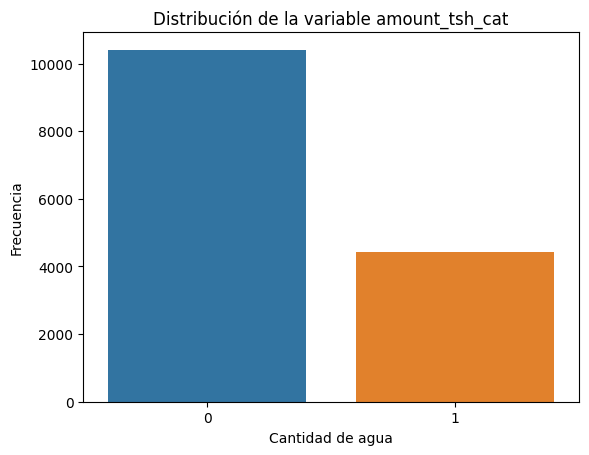

In [ ]:
sns.countplot(data=df_pumps, x='amount_tsh_dum')
plt.xlabel('Cantidad de agua')
plt.ylabel('Frecuencia')
plt.title('Distribución de la variable amount_tsh_cat')

plt.show()

##### **<font color='green'>Variable dummies :</font>**

In [ ]:
replacements = {True: 1, False: 0}
df_pumps['permit'] = df_pumps['permit'].replace(replacements)
df_pumps['public_meeting'] = df_pumps['public_meeting'].replace(replacements)

##### **<font color='green'>Variable tipo object :</font>**


In [ ]:
variables_dummies = df_pumps.select_dtypes(include=['object']).columns.to_list()

In [ ]:
for k in variables_dummies:
    dummies = pd.get_dummies(df_pumps[k], prefix=k, drop_first=True)
    df_pumps = pd.concat([df_pumps, dummies], axis=1)
    df_pumps.drop(k, axis=1, inplace=True)

In [ ]:
df_pumps.head()

,id,gps_height,longitude,latitude,district_code,population,public_meeting,permit,construction_year,year,...,source_spring,source_unknown,source_class_surface,source_class_unknown,waterpoint_type_communal standpipe,waterpoint_type_communal standpipe multiple,waterpoint_type_dam,waterpoint_type_hand pump,waterpoint_type_improved spring,waterpoint_type_other
0,50785,1996.0,35.290799,-4.059696,3.0,321.0,1,1,2012.0,2013.0,...,0,0,1,0,0,0,0,0,0,1
1,51630,1569.0,36.656709,-3.309214,2.0,300.0,1,1,2000.0,2013.0,...,1,0,0,0,1,0,0,0,0,0
2,17168,1567.0,34.767863,-5.004344,2.0,500.0,1,1,2010.0,2013.0,...,0,0,1,0,0,0,0,0,0,1
3,45559,267.0,38.058046,-9.418672,43.0,250.0,1,1,1987.0,2013.0,...,0,0,0,0,0,0,0,0,0,1
4,49871,1260.0,35.006123,-10.950412,3.0,60.0,1,1,2000.0,2013.0,...,1,0,0,0,1,0,0,0,0,0


## **<font color='red'>Correlaciones</font>**

##### **<font color='green'>Mapa general:</font>**

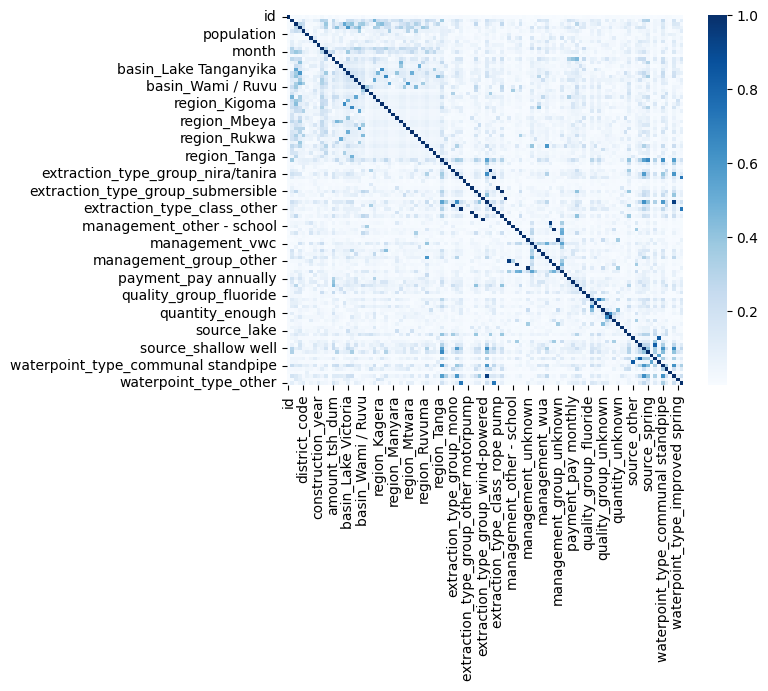

In [ ]:
correlation_mat = abs(df_pumps.corr()) 
sns.heatmap(correlation_mat,  cmap="Blues")
plt.show()

##### **<font color='green'>Visualizando multicolinealidad alta o perfecta:</font>**

In [ ]:
corr_matrix = df_pumps.corr()

# Definir el umbral de correlación
threshold = 0.7

# Encontrar las correlaciones que son mayores que el umbral
high_corr_pairs = []
for col1 in corr_matrix.columns:
    for col2 in corr_matrix.columns:
        if col1 != col2 and abs(corr_matrix.loc[col1, col2]) > threshold and abs(corr_matrix.loc[col1, col2]) < 1:
            high_corr_pairs.append((col1, col2, corr_matrix.loc[col1, col2]))

# Ordenar los pares de mayor a menor correlación
high_corr_pairs.sort(key=lambda x: x[2], reverse=True)

# Mostrar los pares de variables con correlación alta y agregar los nombres sin duplicados a una lista
printed_pairs = set()
corr_cat = []
for pair in high_corr_pairs:
    if (pair[0], pair[1]) not in printed_pairs and (pair[1], pair[0]) not in printed_pairs:
        print(f"{pair[0]} y {pair[1]} tienen una correlación de {pair[2]}")
        printed_pairs.add((pair[0], pair[1]))
        corr_cat.append(pair[0])
        corr_cat.append(pair[1])
        
# Eliminar duplicados de la lista
corr_cat = list(set(corr_cat))


extraction_type_group_mono y extraction_type_class_motorpump tienen una correlación de 0.981820569241657
management_other y management_group_other tienen una correlación de 0.9470141967862364
extraction_type_class_handpump y waterpoint_type_hand pump tienen una correlación de 0.9442603508820845
source_other y source_class_unknown tienen una correlación de 0.8421314250554641
source_river y source_class_surface tienen una correlación de 0.8133250759035632
extraction_type_group_other y waterpoint_type_other tienen una correlación de 0.7240897122667695
extraction_type_class_other y waterpoint_type_other tienen una correlación de 0.7240897122667695
quality_group_good y quality_group_salty tienen una correlación de -0.7533165796440523


In [ ]:
df_pumps[corr_cat]

,extraction_type_group_other,waterpoint_type_other,extraction_type_class_motorpump,management_group_other,waterpoint_type_hand pump,source_other,source_river,quality_group_salty,extraction_type_class_handpump,extraction_type_class_other,management_other,source_class_unknown,source_class_surface,extraction_type_group_mono,quality_group_good
0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,1,1,0,0,0,0,0,0,0,1,0,0,1,0,1
3,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14845,0,0,1,0,0,0,1,0,0,0,0,0,1,1,1
14846,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0
14847,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
14848,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1


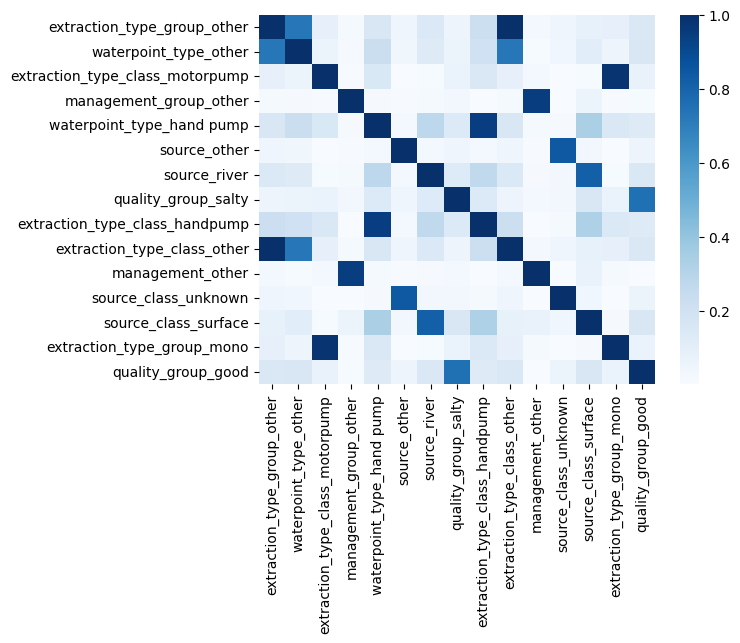

In [ ]:
correlation_mat = abs(df_pumps[corr_cat].corr()) 
sns.heatmap(correlation_mat,  cmap="Blues")
plt.show()

##### **<font color='green'>Eliminando variables con una multicolinealidad alta:</font>**

In [ ]:
df_pumps.drop(columns=['extraction_type_group_other', 'management_other', 'extraction_type_class_handpump', 'source_other', 'source_river', 'waterpoint_type_other', 'quality_group_good', 'extraction_type_group_mono'], axis=1, inplace=True)

## **<font color='red'>Guardando variables</font>**

In [ ]:
df_pumps.to_csv('testLimpios.csv', index=False)

In [ ]:
df_pumps.head()

,id,gps_height,longitude,latitude,district_code,population,public_meeting,permit,construction_year,year,...,source_shallow well,source_spring,source_unknown,source_class_surface,source_class_unknown,waterpoint_type_communal standpipe,waterpoint_type_communal standpipe multiple,waterpoint_type_dam,waterpoint_type_hand pump,waterpoint_type_improved spring
0,50785,1996.0,35.290799,-4.059696,3.0,321.0,1,1,2012.0,2013.0,...,0,0,0,1,0,0,0,0,0,0
1,51630,1569.0,36.656709,-3.309214,2.0,300.0,1,1,2000.0,2013.0,...,0,1,0,0,0,1,0,0,0,0
2,17168,1567.0,34.767863,-5.004344,2.0,500.0,1,1,2010.0,2013.0,...,0,0,0,1,0,0,0,0,0,0
3,45559,267.0,38.058046,-9.418672,43.0,250.0,1,1,1987.0,2013.0,...,1,0,0,0,0,0,0,0,0,0
4,49871,1260.0,35.006123,-10.950412,3.0,60.0,1,1,2000.0,2013.0,...,0,1,0,0,0,1,0,0,0,0
